In [1]:
from urllib2 import Request, urlopen, HTTPError
from urlparse import urlunparse, urlparse
import json 
import pandas as pd
import requests
import requests_cache
from bs4 import BeautifulSoup
requests_cache.install_cache("project141")

import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
url='https://content.guardianapis.com/search?&page-size=50&from-date=2017-02-01&to-date=2017-02-28&format=json&order-by=oldest&api-key=20f08744-f78f-4c02-a35a-6b0772781ed7'
response=requests.get(url)
#response.json()['response']['results'][0]['webUrl']
response.json()

{u'response': {u'currentPage': 1,
  u'orderBy': u'oldest',
  u'pageSize': 50,
  u'pages': 139,
  u'results': [{u'apiUrl': u'https://content.guardianapis.com/crosswords/quick/14582',
    u'id': u'crosswords/quick/14582',
    u'isHosted': False,
    u'sectionId': u'crosswords',
    u'sectionName': u'Crosswords',
    u'type': u'crossword',
    u'webPublicationDate': u'2017-02-01T00:00:01Z',
    u'webTitle': u'Quick crossword No 14,582',
    u'webUrl': u'https://www.theguardian.com/crosswords/quick/14582'},
   {u'apiUrl': u'https://content.guardianapis.com/crosswords/cryptic/27109',
    u'id': u'crosswords/cryptic/27109',
    u'isHosted': False,
    u'sectionId': u'crosswords',
    u'sectionName': u'Crosswords',
    u'type': u'crossword',
    u'webPublicationDate': u'2017-02-01T00:00:01Z',
    u'webTitle': u'Cryptic crossword No 27,109',
    u'webUrl': u'https://www.theguardian.com/crosswords/cryptic/27109'},
   {u'apiUrl': u'https://content.guardianapis.com/housing-network/2017/feb/01/rig

In [3]:
def url_perpage(page,pagesize='50',fromdate='2017-02-01',todate='2017-02-28',form='json',order='oldest',key='20f08744-f78f-4c02-a35a-6b0772781ed7'):
    url='https://content.guardianapis.com/search'
    response=requests.get(url,params={'page':page,'page-size':pagesize,'from-date':fromdate,'to-date':todate,'format':form,'order-by':order,'api-key':key})
    return [x['webUrl'] for x in response.json()['response']['results']]

urllist=[]
for page in range(1,140):
    urllist=urllist+url_perpage(page)
    
    
urllist

[u'https://www.theguardian.com/crosswords/quick/14582',
 u'https://www.theguardian.com/crosswords/cryptic/27109',
 u'https://www.theguardian.com/housing-network/2017/feb/01/right-to-rent-immigration-checks-vulnerable-people-risk',
 u'https://www.theguardian.com/society/2017/feb/01/exeter-prison-drugs-violence-inspectors-reform',
 u'https://www.theguardian.com/tv-and-radio/2017/feb/01/frank-gardner-describes-frustration-after-injury-delayed-bird-quest',
 u'https://www.theguardian.com/society/2017/feb/01/rail-firms-ordered-to-improve-provision-of-accessible-toilets-anne-wafula-strike',
 u'https://www.theguardian.com/society/2017/feb/01/nhs-id-scheme-could-deter-eligible-patients-say-mps',
 u'https://www.theguardian.com/science/2017/feb/01/special-spit-is-the-secret-of-uniquely-sticky-frog-tongues-study-reveals',
 u'https://www.theguardian.com/world/2017/feb/01/backyard-butchers-and-vigilante-farmers-stock-rustling-on-the-rise-in-new-zealand',
 u'https://www.theguardian.com/politics/blog/

In [3]:
def getcontent(url):
    """
    Extract the title, text, and author of an Aggie article
    Input: url-> url for the article. 
    Output: a dictionary that contains the author, text, url and title.       
    """
    artic= requests.get(url)
    soup=BeautifulSoup(artic.text)
    try:
        text=" ".join([i.text.strip() for i in soup.find_all('div',itemprop='articleBody')[0].find_all('p')])
        text=text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    except (IndexError,TypeError):
        text=''
    return text

In [5]:
url='https://content.guardianapis.com/search?&page-size=50&from-date=2017-02-01&to-date=2017-02-07&format=json&order-by=oldest&api-key=20f08744-f78f-4c02-a35a-6b0772781ed7'
response=requests.get(url)
response.json()

{u'response': {u'currentPage': 1,
  u'orderBy': u'oldest',
  u'pageSize': 50,
  u'pages': 36,
  u'results': [{u'apiUrl': u'https://content.guardianapis.com/crosswords/quick/14582',
    u'id': u'crosswords/quick/14582',
    u'isHosted': False,
    u'sectionId': u'crosswords',
    u'sectionName': u'Crosswords',
    u'type': u'crossword',
    u'webPublicationDate': u'2017-02-01T00:00:01Z',
    u'webTitle': u'Quick crossword No 14,582',
    u'webUrl': u'https://www.theguardian.com/crosswords/quick/14582'},
   {u'apiUrl': u'https://content.guardianapis.com/crosswords/cryptic/27109',
    u'id': u'crosswords/cryptic/27109',
    u'isHosted': False,
    u'sectionId': u'crosswords',
    u'sectionName': u'Crosswords',
    u'type': u'crossword',
    u'webPublicationDate': u'2017-02-01T00:00:01Z',
    u'webTitle': u'Cryptic crossword No 27,109',
    u'webUrl': u'https://www.theguardian.com/crosswords/cryptic/27109'},
   {u'apiUrl': u'https://content.guardianapis.com/housing-network/2017/feb/01/righ

In [4]:
def url_perpage(page,pagesize='50',fromdate='2017-02-01',todate='2017-02-07',form='json',order='oldest',key='20f08744-f78f-4c02-a35a-6b0772781ed7'):
    url='https://content.guardianapis.com/search'
    response=requests.get(url,params={'page':page,'page-size':pagesize,'from-date':fromdate,'to-date':todate,'format':form,'order-by':order,'api-key':key})
    return [x['webUrl'] for x in response.json()['response']['results']]

urllist=[]
for page in range(1,37):
    urllist=urllist+url_perpage(page)
    
    
len(urllist)

1783

In [8]:
urllist

[u'https://www.theguardian.com/crosswords/quick/14582',
 u'https://www.theguardian.com/crosswords/cryptic/27109',
 u'https://www.theguardian.com/housing-network/2017/feb/01/right-to-rent-immigration-checks-vulnerable-people-risk',
 u'https://www.theguardian.com/society/2017/feb/01/exeter-prison-drugs-violence-inspectors-reform',
 u'https://www.theguardian.com/tv-and-radio/2017/feb/01/frank-gardner-describes-frustration-after-injury-delayed-bird-quest',
 u'https://www.theguardian.com/society/2017/feb/01/rail-firms-ordered-to-improve-provision-of-accessible-toilets-anne-wafula-strike',
 u'https://www.theguardian.com/society/2017/feb/01/nhs-id-scheme-could-deter-eligible-patients-say-mps',
 u'https://www.theguardian.com/science/2017/feb/01/special-spit-is-the-secret-of-uniquely-sticky-frog-tongues-study-reveals',
 u'https://www.theguardian.com/world/2017/feb/01/backyard-butchers-and-vigilante-farmers-stock-rustling-on-the-rise-in-new-zealand',
 u'https://www.theguardian.com/politics/blog/

In [7]:
urllist[31]

u'https://www.theguardian.com/us-news/2017/feb/01/australian-universities-protest-against-donald-trumps-immigration-ban'

In [8]:
a=' '.join([getcontent(link) for link in urllist])

In [9]:
a

u'  One year ago, on 1 February 2016, the government implemented its "right to rent" scheme, requiring landlords who let property in England to carry out checks on the immigration status of potential tenants, as part of a government drive to create a "hostile environment for illegal migrants". The government plans to extend the scheme to the rest of the UK. But before it does, the government must ask whether the scheme\'s biggest effect has been to deny some of society\'s most vulnerable people the accommodation they need. Right to rent document checks have to be completed by private landlords, as well as some housing associations and, in theory, by anyone taking in a lodger. When the government launched the scheme (pdf) last February, it was estimated that more than 2.6m checks could be needed every year. The problem is that no one knows whether this is happening. The Home Office has admitted it cannot monitor the scheme and it\'s a fair bet given the limited publicity that at least a

In [8]:
content=pd.DataFrame()
for link in urllist:
    content=content.append(pd.DataFrame({'text':[getcontent(link)]}),ignore_index=True)
content

text
0                                                      
1                                                      
2     One year ago, on 1 February 2016, the governme...
3     Prison inspectors have warned that the situati...
4     Frank Gardner, the BBC's security corresponden...
5     Provision of accessible toilets on trains will...
6     A pilot scheme in which patients are asked to ...
7     Scientists have discovered what makes the frog...
8     The thick swarm of black flies hanging above t...
9     7.16pm EST\n19:16 Nicola Slawson The debate ha...
10    Antonio Conte praised Chelsea's personality on...
11    A busy day of negotiations at Crystal Palace s...
12    It is one of the last few weeks in the slow em...
13    For Arsène Wenger it has been more important t...
14    8.24pm EST\n20:24 Time to wrap things up: I'll...
15    Nick Xenophon says negotiations over the Turnb...
16    Malcolm Turnbull's reported $2m donation to th...
17                                                     
18    It has been said that a boat is a hole in the ...
19    Police have moved in to remove homeless people...
20    A billionaire with links to the family of Xi J...
21    The Dakota Access pipeline is in the final pro...
22    Rasoul, a 26-year-old radio operator, stood in...
23                                                     
24    In nominating Neil Gorsuch to the supreme cour...
25    Malcolm Turnbull has said Australia's renewabl...
26    House prices across Australia continued to ris...
27    To be fair, at the level of political messagin...
28    The squirrels look as though they make everyda...
29    Now that political satire is dead, we must mak...
...                                                 ...
1753  As the committee stage of the article 50 bill ...
1754  Year after year, month after month, the deprav...
1755  England needs solutions to fix its broken hous...
1756                                                   
1757  The Russian hacking of the Democratic National...
1758  The Scottish parliament has voted for a symbol...
1759  Theresa May has faced down a Conservative rebe...
1760  A former England international with 209 goals ...
1761  Sajid Javid refused to halt weapons exports to...
1762  Aesop's fable of the boy who cried wolf teache...
1763  A passenger on a flight from Pakistan who was ...
1764  Donald Trump could still be issued with an inv...
1765  • An article (1,700 face long surgery delays a...
1766  The Co-operative Group chief executive, Richar...
1767  As an engineer, Jak Haines never expected to f...
1768  There are those who perceive modern rugby play...
1769  Arts subjects remain as popular as ever among ...
1770  Alastair Cook said he felt left "out to dry" b...
1771  Eddie Jones has been picking the brains of his...
1772  Some families will receive two extra weeks of ...
1773  5.30pm EST\n17:30 So, that's a wrap. Here's ho...
1774  Claudio Ranieri has mounted an impassioned def...
1775  Luis Suárez was sent off as nine-man Barcelona...
1776                                                   
1777  The UK could lose 30,000 finance sector jobs a...
1778  The US government is set to allow the final ph...
1779  It wasn't the outcome progressives were hoping...
1780  Malcolm Turnbull has called the chairman of Au...
1781  A £9m state-of-the-art technical college that ...
1782  The fight over immigration on Capitol Hill may...

[1783 rows x 1 columns]

In [42]:
for x in range(len(urllist)):
    try:
        temp=getcontent(urllist[x])
    except TypeError:
        print x

168
643
691
1710


In [9]:
stemmer = PorterStemmer().stem
tokenize = nltk.word_tokenize
def stem(tokens,stemmer = PorterStemmer().stem):
    """
    stemmatize words
    Input: words
    Output: stemmer
    """
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

In [10]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
tfs = vectorizer.fit_transform(content['text'])

In [11]:
freq=1/vectorizer.idf_
freq

array([ 0.33770545,  0.25221796,  0.30514532, ...,  0.12831261,
        0.12831261,  0.12831261])

In [12]:
vocab=vectorizer.vocabulary_
pop_vocab = {k:freq[v] for k, v in vocab.iteritems() if k.isalpha()}

In [13]:
pop_vocab

{u'fawn': 0.14083874354904813,
 u'circuitri': 0.12831261251262438,
 u'fawk': 0.12831261251262438,
 u'woodi': 0.14540853500659046,
 u'redzepi': 0.12831261251262438,
 u'sonja': 0.12831261251262438,
 u'vani': 0.12831261251262438,
 u'harrisonheadteach': 0.12831261251262438,
 u'suzann': 0.14540853500659046,
 u'francesco': 0.13535461035909754,
 u'nunneri': 0.13535461035909754,
 u'francesca': 0.14540853500659046,
 u'lench': 0.12831261251262438,
 u'scoll': 0.12831261251262438,
 u'baguma': 0.12831261251262438,
 u'scold': 0.13535461035909754,
 u'accret': 0.12831261251262438,
 u'hedegaard': 0.12831261251262438,
 u'crossbar': 0.1528887605679852,
 u'shrovetid': 0.12831261251262438,
 u'pigment': 0.12831261251262438,
 u'loughton': 0.14083874354904813,
 u'foul': 0.17869135742773293,
 u'strictest': 0.12831261251262438,
 u'cullor': 0.12831261251262438,
 u'airfar': 0.12831261251262438,
 u'wooden': 0.16661927283222133,
 u'showcas': 0.18983482039992111,
 u'understock': 0.12831261251262438,
 u'angaza': 0.12

In [14]:
import operator
sortedvoc = sorted(pop_vocab.items(), key=operator.itemgetter(1),reverse= True)
vocdf=pd.DataFrame(sortedvoc)
dfreduce=vocdf.loc[:100,:] #only looked at top 50 words for simplicity
dff=dfreduce.rename(index=str,columns={0:"voc",1:"invf"})

In [37]:
' '.join(dfreduce[0])

u'wa ha thi year time hi said like peopl new make just say onli work come way becaus ani befor day mani need use did want week includ look veri right think sinc know world nation thing end countri doe place anoth live govern good support help chang told month point start follow tri state ask home becom report long feel face mean play everi remain number open differ set dure turn public recent hous continu best issu trump polit howev great life run left group uk person littl realli someth allow second away alreadi famili question believ far leav plan'

In [80]:
textonly=content['text']
a=textonly.iloc[1]

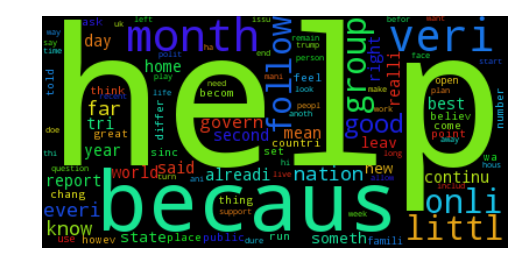

In [38]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(dfreduce[0]))
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

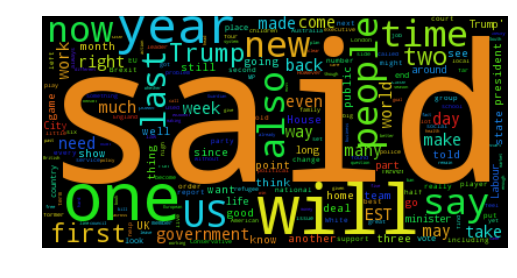

In [10]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate(a)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [10]:
requests_cache.install_cache("project141111")

In [11]:
url="https://api.nytimes.com/svc/mostpopular/v2/mostviewed/all-sections/7/?api-key=e273ed2eb9f24e549143f627cc6ba4b1"
response=requests.get(url)
urllist=[response.json()[u'results'][i][u'url'] for i in range(len(response.json()[u'results']))]

In [12]:
def getcontent(url):
    """
    Extract the title, text, and author of an Aggie article
    Input: url-> url for the article. 
    Output: a dictionary that contains the author, text, url and title.       
    """
    artic= requests.get(url,"lxml")
    soup_arti=BeautifulSoup(artic.text)
    content=soup_arti.select("article[id='story'] > div[class='story-body-supplemental'] > div > p ")
    if content==[]:
        content=soup_arti.select("p[class='paragraph--story']")
    text=" ".join([i.text.strip() for i in content])
    return text

In [13]:
allcontent=[getcontent(i) for i in urllist]

In [14]:
allcontent

[u'WASHINGTON \u2014 President Trump turned the power of the White House against the news media on Friday, escalating his attacks on journalists as \u201cthe enemy of the people\u201d and berating members of his own F.B.I. as \u201cleakers\u201d who he said were putting the nation at risk. In a speech to the Conservative Political Action Conference, Mr. Trump criticized as \u201cfake news\u201d organizations that publish anonymously sourced reports that reflect poorly on him. And in a series of Twitter posts, he assailed the F.B.I. as a dangerously porous agency, condemning unauthorized revelations of classified information from within its ranks and calling for an immediate hunt for leakers. Hours after the speech, as if to demonstrate Mr. Trump\u2019s determination to punish reporters whose coverage he dislikes, Sean Spicer, the White House press secretary, barred journalists from The New York Times and several other news organizations from attending his daily briefing, a highly unusu

In [15]:
df2=pd.DataFrame(allcontent)

In [16]:
df2.columns=['text']
df2

text
0   WASHINGTON — President Trump turned the power ...
1   WASHINGTON — President Trump on Wednesday resc...
2   WASHINGTON — President Trump has directed his ...
3   Not just one, but seven Earth-size planets tha...
4   I spent last week ignoring President Trump. Al...
5   WASHINGTON — Milo Yiannopoulos, a polemical Br...
6   LOS ANGELES — It’s one of Hollywood’s most sec...
7   If you were disappointed that Bill Maher broug...
8   PALM BEACH, Fla. — On Friday night, Fox News a...
9   OLATHE, Kan. — “The Jameson guys,” as some on ...
10  The confirmation of Betsy DeVos as secretary o...
11  PALM BEACH, Fla. — President Trump appointed L...
12  “Pop Icon Andy Warhol Dies After Routine Surge...
13  A week before Michael T. Flynn resigned as nat...
14  WASHINGTON — Reduced to their weakest state in...
15  In many ways she is the typical Broadway audie...
16  There is a mysterious hole in Lake Berryessa i...
17  WASHINGTON — President Trump’s newly appointed...
18  SAN FRANCISCO — When new employees join Uber, ...
19  LONDON — Swedes reacted with confusion, anger ...

In [17]:
df3=content.append(df2,ignore_index=True)

In [18]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
A = vectorizer.fit_transform(df3['text'])
A

<1803x43574 sparse matrix of type '<type 'numpy.float64'>'
	with 478017 stored elements in Compressed Sparse Row format>

In [19]:
P=A.toarray()
K=P.dot(P.T)
U=np.triu(K,k=1)

In [20]:
U

array([[     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
          3811.94479218,   5453.96201953,   4768.90652124],
       ..., 
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,  21535.03810689,  21578.68409175],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,  23013.45694498],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]])

In [28]:
V=U[0:1783,1783:]

In [29]:
V

array([[     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [  7177.23637016,   5121.10132469,   5893.62555809, ...,
          3811.94479218,   5453.96201953,   4768.90652124],
       ..., 
       [  6462.17632543,   4435.1602347 ,   4840.85185636, ...,
          4038.29431004,   6185.01962262,   4411.58401059],
       [  5624.81323564,   6552.45010174,   4722.94154912, ...,
          3608.11840059,   5669.04535523,   4203.8825869 ],
       [  5344.51769837,   4149.81754413,  10336.92720443, ...,
          3408.47655223,   4396.99739532,   4342.23786408]])

In [50]:
sort=np.sort(U,axis=None)
print np.where(U==sort[-1]), np.where(U==sort[-2]), np.where(U==sort[-3])

(array([256], dtype=int64), array([271], dtype=int64)) (array([552], dtype=int64), array([1229], dtype=int64)) (array([30], dtype=int64), array([1698], dtype=int64))


In [51]:
np.argsort(U,axis=None)

array([      0, 2144278, 2144279, ...,   55788,  996485,  461839], dtype=int64)

In [52]:
461839%1803

271

In [53]:
461839/1803

256

In [30]:
sort=np.sort(V,axis=None)
print np.where(V==sort[-1]), np.where(V==sort[-2]), np.where(V==sort[-3])

(array([30], dtype=int64), array([4], dtype=int64)) (array([30], dtype=int64), array([9], dtype=int64)) (array([1698], dtype=int64), array([4], dtype=int64))


In [46]:
V[30,4]

89024.131669990733

In [44]:
U[30,1787]

89024.131669990733

In [49]:
df2['text'][4]

u'I spent last week ignoring President Trump. Although I am ordinarily a politics junkie, I didn\u2019t read, watch or listen to a single story about anything having to do with our 45th president. What I missed, by many accounts, was one of the strangest and most unpredictable weeks of news in modern political history. Among other things, there was the resignation of the national security adviser, Michael T. Flynn, and an \u201cOprah Winfrey Show\u201d tape that led to the downfall of the nominee for secretary of labor, Andrew F. Puzder. It wasn\u2019t my aim to stick my head in the sand. I did not quit the news. Instead, I spent as much time as I normally do online (all my waking hours), but shifted most of my energy to looking for Trump-free zones. My point: I wanted to see what I could learn about the modern news media by looking at how thoroughly Mr. Trump had subsumed it. In one way, my experiment failed: I could find almost no Trump-free part of the press. But as the week wore on

In [37]:
content['text'][1697]

u'Good news: netball, the least-cool sport in the history of all sport, is  getting a \xa316.9m government grant, with \xa310.5m earmarked to encourage adult women to take it up again. That\'s twice as much as tennis and three times what basketball will receive over the next four years. Now I can say uncool because I play netball every week, and have gone to great lengths to avoid admitting it. It is indeed deeply uncool, and there are several reasons: its reputation at schools, its complex rules and its tremendous restrictions on movement, not to mention the fact that marking an opponent requires a player to do a modified Nazi salute. But, as Andrew St Ledger, head of media at Sport England, which awarded the grant, explains, it is popular and it is, arguably, needed. "It\'s all about getting people who are typically not represented in sports and physical activity to take part. We know that if you go from doing nothing to even a tiny amount of exercise the benefits are huge," he says.

In [48]:
df3['text'][1787]

u'I spent last week ignoring President Trump. Although I am ordinarily a politics junkie, I didn\u2019t read, watch or listen to a single story about anything having to do with our 45th president. What I missed, by many accounts, was one of the strangest and most unpredictable weeks of news in modern political history. Among other things, there was the resignation of the national security adviser, Michael T. Flynn, and an \u201cOprah Winfrey Show\u201d tape that led to the downfall of the nominee for secretary of labor, Andrew F. Puzder. It wasn\u2019t my aim to stick my head in the sand. I did not quit the news. Instead, I spent as much time as I normally do online (all my waking hours), but shifted most of my energy to looking for Trump-free zones. My point: I wanted to see what I could learn about the modern news media by looking at how thoroughly Mr. Trump had subsumed it. In one way, my experiment failed: I could find almost no Trump-free part of the press. But as the week wore on